## Submitted by : Srilathaa Vasu

## Task-2 : Prediction using Unsupervised ML

#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [2]:
data=pd.read_csv('Iris.csv')
data.drop(['Id'],axis=1,inplace=True)

In [3]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.shape

(150, 5)

# Exploratory Data Analysis

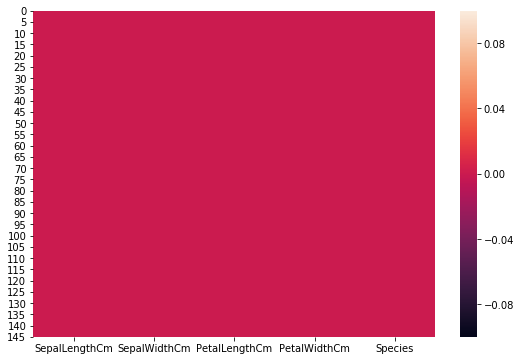

In [7]:
#Check whether null values are present or not 
fig = plt.figure(figsize=(9,6))
sns.heatmap(data.isnull())

In [8]:
#We can also check by using .isna() or .isnull() method
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#Here you can observe that there is no null values present in this data set.

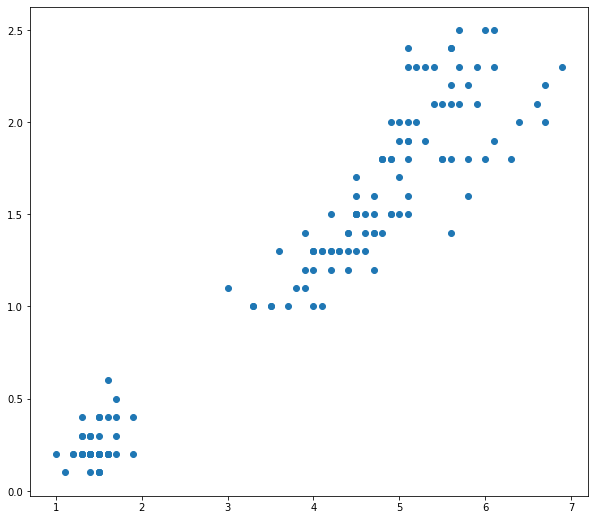

In [10]:
fig=plt.figure(figsize=(10,9))
plt.scatter(x='PetalLengthCm',y='PetalWidthCm',data=data)

In [11]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


* We have to perform correlation plot to check which of the factors are more related to the dependent variable(species) and which factors are less related to the dependent variable.

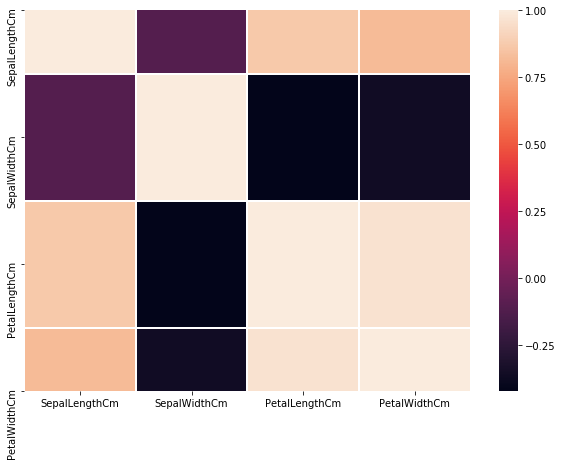

In [12]:
#Correlation plot
fig =plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),linewidths=1)

* From the correlation plot we can see which factors have strong relation and which factors have weak relation.
* From the plot, there is a clear inference that petal length and petal width are the important factors to determine the species.

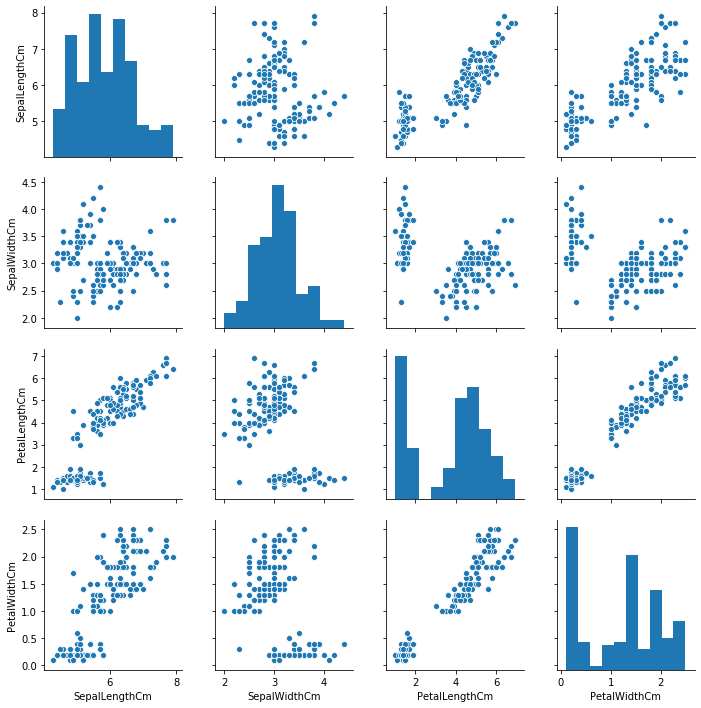

In [13]:
sns.pairplot(data)

## Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

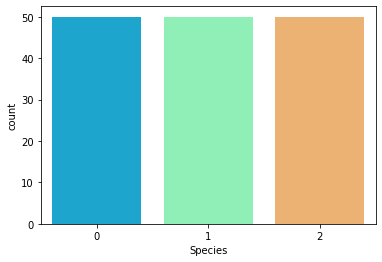

In [15]:
sns.countplot(data['Species'],palette='rainbow')

In [16]:
data=data.iloc[:,[0,1,2,3]].values

# Elbow method

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.59897843428713,
 30.085307692307694,
 28.06327473272554,
 26.587316820410813]

## To find the optimum number of clusters

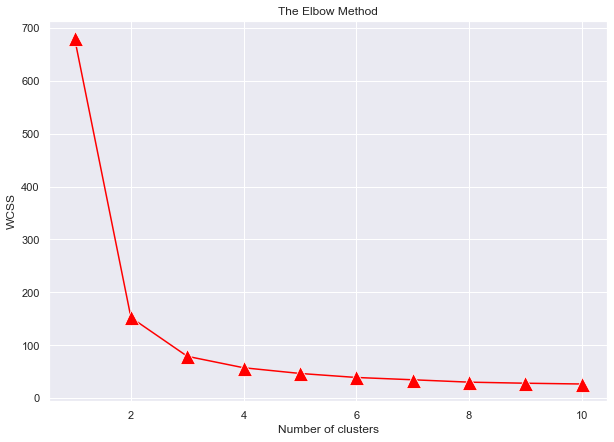

In [19]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.lineplot(range(1, 11), wcss,marker='^',color='red',markersize=15)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* We select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in wcss is minimal.
* With an increase in the number of clusters, the WCSS value decreases.
* Therefore, the optimum value for 'K' is 3.

In [20]:
#Initialization using K-means++

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(data)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Visualizing the clusters

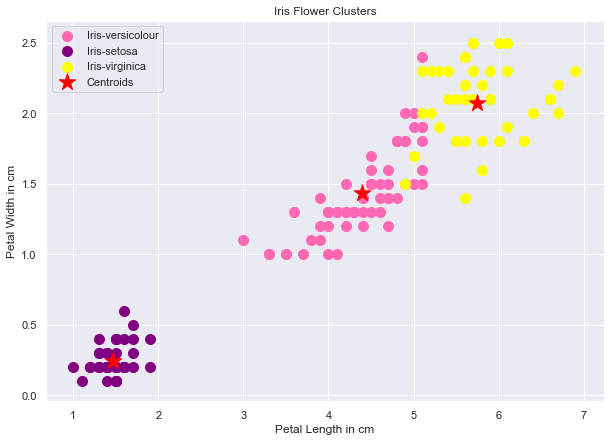

In [21]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(data[y_kmeans == 0, 2], data[y_kmeans == 0, 3], s = 100, c = 'hotpink', label = 'Iris-versicolour')
plt.scatter(data[y_kmeans == 1, 2], data[y_kmeans == 1, 3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(data[y_kmeans == 2, 2], data[y_kmeans == 2, 3],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='*',
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

* We can see that our predicted graph is quite similar to the actual one.

# Thank You